<a href="https://colab.research.google.com/github/mdsaifin/Load_forecast/blob/main/load_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
#NIT Patna Energy Load Prediction
#By SARIMA Model
#Written by MD SAIF
#date of starting : 2 Feb 2023
#date of completion : 6 Feb 2023
#Place : NIT Patna


# Loading Libraries

In [115]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Loading Training Data

In [116]:
train = pd.read_csv("train.csv")

In [117]:
train

,Log Date / Time,NBCC FEEDER PILLER,LIBRARY BLDG,GIRLS HOSTEL,MAIN BLDG,CIVIL BLDG,FEEDER PILLER 4,FEEDER PILLER 2,SAC BLDG,FEEDER PILLER 5,MAIN POWER,TOTAL
0,01-01-2020 00:00,0.00,0.00,0.00,0.00,0.00,0.00,1041.41,181.26,367.04,7.28,1596.99
1,02-01-2020 00:00,0.00,0.00,0.00,0.00,0.00,0.00,985.79,194.38,355.01,8.31,1543.49
2,03-01-2020 00:00,0.00,0.00,0.00,0.00,0.00,0.00,996.35,200.86,348.99,8.30,1554.50
3,04-01-2020 00:00,0.00,0.00,0.00,0.00,0.00,0.00,920.51,171.73,344.93,6.64,1443.81
4,05-01-2020 00:00,0.00,0.00,0.00,0.00,0.00,0.00,887.94,133.01,376.06,5.65,1402.66
...,...,...,...,...,...,...,...,...,...,...,...,...
300,27-10-2020 00:00,99.30,52.35,160.06,37.76,62.64,14.40,908.42,97.71,171.46,7.27,1611.37
301,28-10-2020 00:00,92.35,43.25,151.52,65.15,35.15,14.16,905.73,87.90,180.54,8.38,1584.13
302,29-10-2020 00:00,100.93,48.66,140.90,50.75,46.80,14.16,863.81,84.14,162.21,7.67,1520.03
303,30-10-2020 00:00,83.90,37.25,80.86,28.10,19.09,14.22,836.48,62.46,200.38,5.94,1368.68


In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Log Date / Time     305 non-null    object 
 1   NBCC FEEDER PILLER  305 non-null    float64
 2   LIBRARY BLDG        305 non-null    float64
 3   GIRLS HOSTEL        305 non-null    float64
 4   MAIN BLDG           305 non-null    float64
 5   CIVIL BLDG          305 non-null    float64
 6   FEEDER PILLER 4     305 non-null    float64
 7   FEEDER PILLER 2     305 non-null    float64
 8   SAC BLDG            305 non-null    float64
 9   FEEDER PILLER 5     305 non-null    float64
 10  MAIN POWER          305 non-null    float64
 11  TOTAL               305 non-null    float64
dtypes: float64(11), object(1)
memory usage: 28.7+ KB


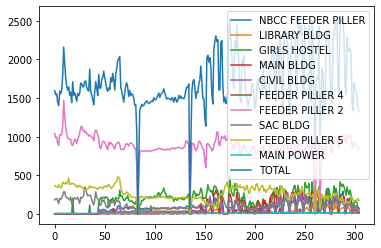

In [119]:
train.plot()


# Loading Test data

In [120]:
test = pd.read_csv("test.csv")

In [121]:
test

,Log Date / Time,NBCC FEEDER PILLER,LIBRARY BLDG,GIRLS HOSTEL,MAIN BLDG,CIVIL BLDG,FEEDER PILLER 4,FEEDER PILLER 2,SAC BLDG,FEEDER PILLER 5,MAIN POWER,TOTAL
0,01-11-2020 00:00,62.24,37.45,79.90,21.44,14.40,14.22,867.33,56.82,195.30,5.56,1354.66
1,02-11-2020 00:00,85.79,43.85,84.16,41.09,43.33,14.22,915.78,84.05,182.24,6.63,1501.14
2,03-11-2020 00:00,35.81,37.00,75.94,0.00,12.11,14.46,865.73,46.98,203.36,5.58,1296.97
3,04-11-2020 00:00,55.42,36.70,78.72,3.58,22.93,14.34,944.64,85.84,180.06,7.29,1429.52
4,05-11-2020 00:00,82.27,36.80,79.04,12.48,44.16,14.34,914.24,82.83,224.48,6.93,1497.57
5,06-11-2020 00:00,60.48,37.30,85.76,18.30,35.63,14.28,886.08,81.17,227.04,6.98,1453.02
6,07-11-2020 00:00,47.14,36.86,59.52,11.14,21.97,14.40,835.20,50.46,240.93,5.57,1323.19
7,08-11-2020 00:00,53.18,36.45,50.94,10.24,27.12,14.46,874.82,57.79,215.07,5.35,1345.42
8,09-11-2020 00:00,74.94,28.40,70.82,16.58,43.20,14.28,882.37,80.62,225.22,7.13,1443.56
9,10-11-2020 00:00,83.42,15.90,60.86,4.99,22.91,14.28,883.58,96.21,204.38,7.05,1393.58


In [122]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Log Date / Time     30 non-null     object 
 1   NBCC FEEDER PILLER  30 non-null     float64
 2   LIBRARY BLDG        30 non-null     float64
 3   GIRLS HOSTEL        30 non-null     float64
 4   MAIN BLDG           30 non-null     float64
 5   CIVIL BLDG          30 non-null     float64
 6   FEEDER PILLER 4     30 non-null     float64
 7   FEEDER PILLER 2     30 non-null     float64
 8   SAC BLDG            30 non-null     float64
 9   FEEDER PILLER 5     30 non-null     float64
 10  MAIN POWER          30 non-null     float64
 11  TOTAL               30 non-null     float64
dtypes: float64(11), object(1)
memory usage: 2.9+ KB


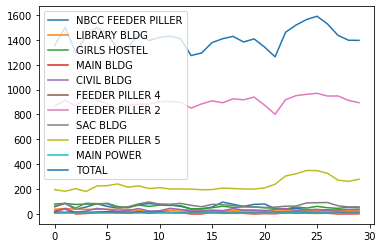

In [123]:
test.plot()

# Fitting SARIMA model to the training data

In [124]:
model_sarima = SARIMAX(train["TOTAL"], order=(2,1,2), seasonal_order=(1,1,1,12))
model_sarima = model_sarima.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#Forecasting energy load using the SARIMA model

In [125]:
predictions_sarima = model_sarima.predict(start=len(train), end=len(train)+len(test)-1, typ="levels")

In [126]:
predictions_sarima

305    1541.620427
306    1652.320256
307    1568.166814
308    1479.197195
309    1631.449592
310    1682.484281
311    1560.944581
312    1623.408857
313    1554.154906
314    1621.911272
315    1595.253146
316    1655.188623
317    1630.987137
318    1635.696894
319    1593.205422
320    1571.001879
321    1618.083141
322    1651.541065
323    1606.530529
324    1620.717116
325    1548.362686
326    1591.555862
327    1547.698555
328    1593.811669
329    1617.360519
330    1640.905898
331    1588.184282
332    1551.818041
333    1618.741662
334    1656.214752
Name: predicted_mean, dtype: float64

#Plotting the original and forecasted data

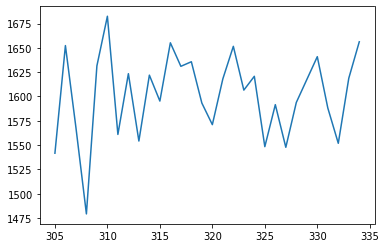

In [127]:
predictions_sarima.plot()

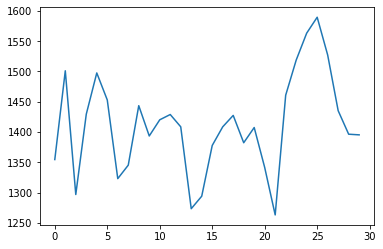

In [128]:
test['TOTAL'].plot()

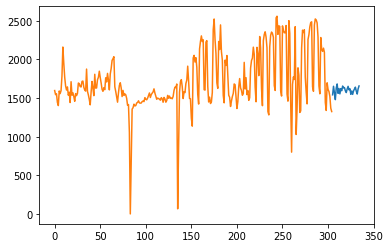

In [129]:
predictions_sarima.plot()
train['TOTAL'].plot()
plt.show()

#Calculating the Root Mean Square Error

In [130]:
mse_sarima = mean_squared_error(test["TOTAL"], predictions_sarima)
rmse_sarima = np.sqrt(mse_sarima)

In [131]:
rmse_sarima

206.9908751364675